In [1]:
import numpy as np
from math import sqrt,log10, log
import pylab as plt
from scipy.interpolate import interp1d as interp
from scipy.interpolate import UnivariateSpline as spline
from scipy.optimize import brentq, minimize_scalar
from profiles import build_profile, build_kernel
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
from fitter import MinuitFitter

%matplotlib inline

In [2]:
directory = '/home/andrea/Desktop/work/DWARF/dsphsim/'
rh = 0.04
D = 39.81
theta = 2*rh/D
dwarf_props = {'D':D, 'theta':theta, 'rt':np.inf}

## True values

In [3]:
dm_true = build_profile('NFW')
rvmax = 0.757
vmax = 10.4
rs = rvmax/2.163
rhos = 4.625 * (vmax/rs)**2 / (4*np.pi*4.302e-6)
dm_true.r0 = rs
dm_true.rho0 = rhos
Jtrue = log10(dm_true.Jfactor(**dwarf_props))
print 'rs = %.2f, rhos = %.2e, J = %g'%(rs,rhos,Jtrue)

rs = 0.35, rhos = 7.55e+07, J = 16.724


In [4]:
dm = build_profile('NFW', r0=rs)
st = build_profile('plummer',rh=rh) # Plummer Stellar profile
kr = build_kernel('iso') # isotropic kernel
Sigma = SphericalJeansDispersion(dm, st, kr, dwarf_props)

In [5]:
#R, v = np.loadtxt(directory+'Ret2_data/dsph_001.txt',usecols=(5, 7),unpack=True)
R, v = np.load('results/equiRdSphs.npy')
vnan = np.isnan(v)
v = v[~vnan]
R = R[~vnan]
dv = np.zeros_like(v)

In [6]:
LL = GaussianLikelihood([R, v, dv, 0.], Sigma)
LL.set_free('dm_r0')
LL.set_free('dm_a')
LL.set_free('dm_b')
LL.set_free('dm_c')
#LL.set_free('ker_beta')

In [7]:
J_array = np.linspace(15, 19, 30)
L_arr = np.empty([0])
parameters = [par.split('_')[-1] for par in LL.free_pars.keys()]
for par in parameters:
    exec( '%s_arr = np.empty([0])'%par)

In [8]:
parameters

['a', 'b', 'J', 'c', 'r0']

In [32]:
for j,J in enumerate(J_array):
    M = MinuitFitter(LL)
    # J
    M.set_value('J',J)
    M.set_fixed('J')
    # r0
    M.set_value('dm_r0', 0.35)
    M.set_error('dm_r0', 0.01)
    # a
    M.set_value('dm_a', 1.)
    M.set_error('dm_a', 0.01)
    M.set_bound('dm_a', (0.,2))
    # b
    M.set_value('dm_b', 3.)
    M.set_error('dm_b', 0.01)
    M.set_bound('dm_b', (0.,10))
    # c
    M.set_value('dm_c', 1.)
    M.set_error('dm_c', 0.01)
    M.set_bound('dm_c', (0.,3))
    # beta
    #M.set_value('ker_beta',0.)
    #M.set_error('ker_beta',0.01)
    
    M.settings['print_level'] = 1
    M.set_minuit(tol=1e4,strategy=1)
    
    valid = False
    while not valid:
        BF = M.migrad_min()
        valid = BF[0]['is_valid']
        if M.minuit.tol>1e6 and not valid:
            break
        else:
            M.minuit.tol *= 10
    else:
        if not np.isnan(BF[0]['edm']):
            L_arr = np.append(L_arr, BF[0]['fval'])
            for n,par in enumerate(parameters):
                exec( "{0}_arr = np.append({0}_arr, BF[1][n]['value'])".format(par))

FCN = 2422.46533383 
 TOTAL NCALL = 369 
 NCALLS = 369 
 
 
 EDM = 0.216961683273 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,9.031131e-01,1.474415e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.951123e+00,2.885006e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,4.207594e-01,9.641147e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,8.314181e-02,2.550285e-02,0.000000e+00,0.000000e+00,,,


FCN = 2422.02407413 
 TOTAL NCALL = 301 
 NCALLS = 301 
 
 
 EDM = 0.309653114539 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,7.640896e-01,8.687489e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.150235e+00,2.796938e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.513793e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,4.344325e-01,7.879553e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,1.033047e-01,2.629456e-02,0.000000e+00,0.000000e+00,,,


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


FCN = 2422.72170388 
 TOTAL NCALL = 261 
 NCALLS = 261 
 
 
 EDM = 0.334243281787 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,7.154812e-01,7.255901e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.479685e+00,2.178514e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.527586e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,5.600751e-01,7.094385e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,1.719098e-01,2.749610e-02,0.000000e+00,0.000000e+00,,,


FCN = 2420.39609576 
 TOTAL NCALL = 328 
 NCALLS = 328 
 
 
 EDM = 0.455027434657 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,9.638574e-01,1.283159e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.750775e+00,1.803808e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.541379e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,6.574004e-01,7.196477e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,7.872945e-02,1.694498e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.428103
     dm_b = +1.598400
        J = +15.551724
     dm_c = +0.799455
    dm_r0 = -0.006906

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.392033
     dm_b = +1.513316
        J = +15.551724
     dm_c = +0.791544
    dm_r0 = -0.019995

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.390261
     dm_b = +1.509112
        J = +15.551724
     dm_c = +0.791149
    dm_r0 = -0.020650

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.390173
     dm_b = +1.508902
        J = +15.551724
     dm_c = +0.791129
    dm_r0 = -0.020682

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2428.56914253 
 TOTAL NCALL = 126 
 NCALLS = 113 
 
 
 EDM = 8.6205068197 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.280967e+00,2.187631e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.624566e+00,5.888858e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.555172e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.625553e-01,4.198346e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.548812e-01,6.755912e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.427596
     dm_b = +1.596663
        J = +15.551724
     dm_c = +0.799342
    dm_r0 = -0.007176

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.391518
     dm_b = +1.511532
        J = +15.551724
     dm_c = +0.791426
    dm_r0 = -0.020279

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.389745
     dm_b = +1.507325
        J = +15.551724
     dm_c = +0.791030
    dm_r0 = -0.020934

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.389657
     dm_b = +1.507115
        J = +15.551724
     dm_c = +0.791011
    dm_r0 = -0.020967

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2428.56914253 
 TOTAL NCALL = 13130 
 NCALLS = 17 
 
 
 EDM = 8.63463879078 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.280967e+00,2.187631e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.624566e+00,5.888858e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.555172e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.625553e-01,4.198346e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.548812e-01,6.755912e-02,0.000000e+00,0.000000e+00,,,


FCN = 2428.56914253 
 TOTAL NCALL = 13160 
 NCALLS = 17 
 
 
 EDM = 8.63463879078 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.280967e+00,2.187631e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.624566e+00,5.888858e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.555172e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.625553e-01,4.198346e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.548812e-01,6.755912e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.143649
     dm_b = +3.747938
        J = +15.689655
     dm_c = +1.125970
    dm_r0 = -0.350482

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.118245
     dm_b = +3.786318
        J = +15.689655
     dm_c = +1.132353
    dm_r0 = -0.385506

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.117036
     dm_b = +3.788239
        J = +15.689655
     dm_c = +1.132672
    dm_r0 = -0.387257

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.116975
     dm_b = +3.788335
        J = +15.689655
     dm_c = +1.132688
    dm_r0 = -0.387344

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2485.76976688 
 TOTAL NCALL = 64 
 NCALLS = 51 
 
 
 EDM = 671.960213076 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.000000e+00,4.313828e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,5.481119e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.568966e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,1.503349e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,2.842516e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +1.435750
     dm_b = +1.843756
        J = +15.689655
     dm_c = +0.578206
    dm_r0 = -9.614516

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.693053
     dm_b = +1.791378
        J = +15.689655
     dm_c = +0.559277
    dm_r0 = -10.112741

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.656984
     dm_b = +1.788775
        J = +15.689655
     dm_c = +0.558337
    dm_r0 = -10.137653

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.655193
     dm_b = +1.788645
        J = +15.689655
     dm_c = +0.558290
    dm_r0 = -10.138898

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is 

FCN = 2485.76976688 
 TOTAL NCALL = 105 
 NCALLS = 15 
 
 
 EDM = 668.892724692 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.000000e+00,4.313828e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,5.481119e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.568966e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,1.503349e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,2.842516e-01,0.000000e+00,0.000000e+00,,,


FCN = 2485.76976688 
 TOTAL NCALL = 146 
 NCALLS = 15 
 
 
 EDM = 668.892724692 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.000000e+00,4.313828e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,5.481119e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.568966e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,1.503349e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,2.842516e-01,0.000000e+00,0.000000e+00,,,


FCN = 2485.76976688 
 TOTAL NCALL = 13148 
 NCALLS = 15 
 
 
 EDM = 668.892724692 
 GOAL EDM = 500.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.000000e+00,4.313828e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,5.481119e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.568966e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,1.503349e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,2.842516e-01,0.000000e+00,0.000000e+00,,,


FCN = 2420.19298904 
 TOTAL NCALL = 180 
 NCALLS = 180 
 
 
 EDM = 0.0713187667126 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,6.377464e-01,8.714805e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.405009e+00,2.536429e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.582759e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,7.669268e-01,5.413491e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.141421e-01,6.135251e-02,0.000000e+00,0.000000e+00,,,


FCN = 2420.76951352 
 TOTAL NCALL = 113 
 NCALLS = 113 
 
 
 EDM = 0.135303982602 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,7.594817e-01,1.367294e-01,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.468354e+00,2.435193e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.596552e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.250092e-01,5.205814e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.618336e-01,8.208660e-02,0.000000e+00,0.000000e+00,,,


FCN = 2420.07672823 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 0.37507999833 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,7.064213e-01,9.269921e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.343373e+00,3.172344e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.610345e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.525524e-01,6.720223e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.588830e-01,8.616259e-02,0.000000e+00,0.000000e+00,,,


FCN = 2419.37486685 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.17356104371 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,6.175084e-01,9.197940e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.342999e+00,2.736296e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.624138e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.434417e-01,6.013878e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.744086e-01,1.031279e-01,0.000000e+00,0.000000e+00,,,


FCN = 2418.97272399 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 0.198516163413 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.978164e-01,6.047399e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.548147e+00,2.520529e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.637931e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.003639e-01,5.803917e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.843117e-01,1.511538e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.614207
     dm_b = +2.894737
        J = +16.517241
     dm_c = +0.892644
    dm_r0 = -0.248282

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.622786
     dm_b = +2.888774
        J = +16.517241
     dm_c = +0.887460
    dm_r0 = -0.277436

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.623215
     dm_b = +2.888476
        J = +16.517241
     dm_c = +0.887201
    dm_r0 = -0.278893

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.623237
     dm_b = +2.888461
        J = +16.517241
     dm_c = +0.887188
    dm_r0 = -0.278966

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2422.25965365 
 TOTAL NCALL = 95 
 NCALLS = 82 
 
 
 EDM = 3.77606158591 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.505793e-01,6.698443e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.014754e+00,2.253121e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.651724e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.980513e-01,6.237247e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.347831e-01,2.289521e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.614204
     dm_b = +2.894755
        J = +16.517241
     dm_c = +0.892647
    dm_r0 = -0.248260

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.622782
     dm_b = +2.888792
        J = +16.517241
     dm_c = +0.887463
    dm_r0 = -0.277412

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.623211
     dm_b = +2.888494
        J = +16.517241
     dm_c = +0.887204
    dm_r0 = -0.278870

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.623233
     dm_b = +2.888479
        J = +16.517241
     dm_c = +0.887191
    dm_r0 = -0.278943

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2422.25965365 
 TOTAL NCALL = 13101 
 NCALLS = 19 
 
 
 EDM = 6.29973786854 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.505793e-01,6.698443e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.014754e+00,2.253121e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.651724e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.980513e-01,6.237247e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.347831e-01,2.289521e-01,0.000000e+00,0.000000e+00,,,


FCN = 2422.25965365 
 TOTAL NCALL = 13133 
 NCALLS = 19 
 
 
 EDM = 6.29973786854 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.505793e-01,6.698443e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.014754e+00,2.253121e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.651724e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.980513e-01,6.237247e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.347831e-01,2.289521e-01,0.000000e+00,0.000000e+00,,,


FCN = 2418.3771759 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.0219571413476 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.737041e-01,5.709249e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.246344e+00,2.337347e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.665517e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.562371e-01,5.407261e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.738901e-01,9.711806e-02,0.000000e+00,0.000000e+00,,,


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


FCN = 2418.53150436 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.0258543379834 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.332249e-01,3.809898e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.682302e+00,2.805802e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.679310e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.019817e+00,5.201950e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,7.042144e-01,2.256349e-01,0.000000e+00,0.000000e+00,,,


FCN = 2418.53093105 
 TOTAL NCALL = 94 
 NCALLS = 94 
 
 
 EDM = 0.13058319754 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,4.254307e-01,5.701922e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.255820e+00,1.861584e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.693103e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.042087e+00,6.919544e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,4.050164e-01,1.066875e-01,0.000000e+00,0.000000e+00,,,


FCN = 2420.90923493 
 TOTAL NCALL = 85 
 NCALLS = 85 
 
 
 EDM = 0.484539169224 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,2.983222e-01,3.273747e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.968959e+00,1.289994e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.706897e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.871395e-01,6.411216e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.734448e-01,1.500844e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.263934
     dm_b = +3.325879
        J = +17.206897
     dm_c = +1.112515
    dm_r0 = -0.457752

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.259588
     dm_b = +3.342403
        J = +17.206897
     dm_c = +1.118209
    dm_r0 = -0.498139

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.259371
     dm_b = +3.343229
        J = +17.206897
     dm_c = +1.118494
    dm_r0 = -0.500158

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.259360
     dm_b = +3.343271
        J = +17.206897
     dm_c = +1.118508
    dm_r0 = -0.500259

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2479.42752136 
 TOTAL NCALL = 86 
 NCALLS = 73 
 
 
 EDM = 2472.14814654 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.570297e-01,4.630587e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,7.717460e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.720690e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,4.180145e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,3.834902e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.692825
     dm_b = +0.003509
        J = +17.206897
     dm_c = +0.440531
    dm_r0 = -26.348417

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.503265
     dm_b = +0.000867
        J = +17.206897
     dm_c = +0.552848
    dm_r0 = -27.683337

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.494283
     dm_b = +0.001148
        J = +17.206897
     dm_c = +0.558727
    dm_r0 = -27.750084

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.493835
     dm_b = +0.001163
        J = +17.206897
     dm_c = +0.559021
    dm_r0 = -27.753421

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is

FCN = 2479.42752136 
 TOTAL NCALL = 129 
 NCALLS = 17 
 
 
 EDM = 2473.7385005 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.570297e-01,4.630587e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,7.717460e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.720690e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,4.180145e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,3.834902e-01,0.000000e+00,0.000000e+00,,,


FCN = 2479.42752136 
 TOTAL NCALL = 172 
 NCALLS = 17 
 
 
 EDM = 2473.7385005 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.570297e-01,4.630587e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,7.717460e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.720690e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,4.180145e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,3.834902e-01,0.000000e+00,0.000000e+00,,,


FCN = 2479.42752136 
 TOTAL NCALL = 13176 
 NCALLS = 17 
 
 
 EDM = 2473.7385005 
 GOAL EDM = 500.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.570297e-01,4.630587e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,7.717460e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.720690e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,4.180145e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,3.834902e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.317543
     dm_b = +2.959358
        J = +17.344828
     dm_c = +0.918283
    dm_r0 = -0.447629

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.324422
     dm_b = +2.961861
        J = +17.344828
     dm_c = +0.917930
    dm_r0 = -0.493264

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.324768
     dm_b = +2.961986
        J = +17.344828
     dm_c = +0.917912
    dm_r0 = -0.495545

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.324785
     dm_b = +2.961992
        J = +17.344828
     dm_c = +0.917911
    dm_r0 = -0.495659

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2423.24925152 
 TOTAL NCALL = 93 
 NCALLS = 80 
 
 
 EDM = 5.27577601303 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.933110e-01,3.637731e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.909437e+00,1.071953e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.734483e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.253469e-01,5.062555e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,4.650596e-01,3.675285e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.317650
     dm_b = +2.959287
        J = +17.344828
     dm_c = +0.918302
    dm_r0 = -0.448451

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.324535
     dm_b = +2.961786
        J = +17.344828
     dm_c = +0.917950
    dm_r0 = -0.494126

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.324881
     dm_b = +2.961910
        J = +17.344828
     dm_c = +0.917933
    dm_r0 = -0.496410

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.324898
     dm_b = +2.961917
        J = +17.344828
     dm_c = +0.917932
    dm_r0 = -0.496524

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2423.24925152 
 TOTAL NCALL = 13097 
 NCALLS = 17 
 
 
 EDM = 5.2830179613 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.933110e-01,3.637731e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.909437e+00,1.071953e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.734483e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.253469e-01,5.062555e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,4.650596e-01,3.675285e-01,0.000000e+00,0.000000e+00,,,


FCN = 2423.24925152 
 TOTAL NCALL = 13127 
 NCALLS = 17 
 
 
 EDM = 5.2830179613 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.933110e-01,3.637731e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.909437e+00,1.071953e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.734483e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.253469e-01,5.062555e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,4.650596e-01,3.675285e-01,0.000000e+00,0.000000e+00,,,


FCN = 2418.8110524 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.0141490924696 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,2.345707e-01,4.030526e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.250164e+00,2.852708e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.748276e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,8.827554e-01,1.653601e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,4.034448e-01,2.101416e-01,0.000000e+00,0.000000e+00,,,


FCN = 2419.76028347 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 514.261867143 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,2.105109e-01,3.248399e-03,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.037299e+00,2.172183e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.762069e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.001807e+00,4.840352e-03,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,5.596006e-01,2.846709e-02,0.000000e+00,0.000000e+00,,,


FCN = 2419.76028347 
 TOTAL NCALL = 191 
 NCALLS = 17 
 
 
 EDM = 1.03233268896 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,2.105109e-01,3.248399e-03,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.037299e+00,2.172183e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.762069e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.001807e+00,4.840352e-03,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,5.596006e-01,2.846709e-02,0.000000e+00,0.000000e+00,,,


FCN = 2420.2607327 
 TOTAL NCALL = 87 
 NCALLS = 87 
 
 
 EDM = 0.38702481929 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.780454e-01,7.121499e-03,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.945125e+00,1.526084e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.775862e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.698973e-01,1.042883e-01,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,4.074003e-01,6.210938e-02,0.000000e+00,0.000000e+00,,,


FCN = 2419.832931 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.32851943491 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.736419e-01,3.614311e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.965374e+00,6.786776e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.789655e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.813783e-01,3.565329e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.900086e-01,2.698525e-01,0.000000e+00,0.000000e+00,,,


FCN = 2419.7764223 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.0923038558358 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.653517e-01,2.171995e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.977999e+00,1.587924e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.803448e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.882198e-01,2.628611e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.783594e-01,2.074045e-01,0.000000e+00,0.000000e+00,,,


FCN = 2419.93216927 
 TOTAL NCALL = 69 
 NCALLS = 69 
 
 
 EDM = 0.086917047862 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.573552e-01,1.732460e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.989069e+00,9.618527e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.817241e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.934767e-01,6.410628e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.649030e-01,2.122824e-01,0.000000e+00,0.000000e+00,,,


FCN = 2420.19338184 
 TOTAL NCALL = 71 
 NCALLS = 71 
 
 
 EDM = 0.00946090244015 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.486669e-01,2.599146e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.999544e+00,3.051125e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.831034e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,9.997922e-01,8.953743e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.508290e-01,1.192670e-01,0.000000e+00,0.000000e+00,,,


FCN = 2420.6314888 
 TOTAL NCALL = 80 
 NCALLS = 80 
 
 
 EDM = 0.22606220107 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.405369e-01,2.154360e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.007734e+00,9.878773e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.844828e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.004807e+00,8.512959e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.314592e-01,2.348136e-01,0.000000e+00,0.000000e+00,,,


FCN = 2421.23944339 
 TOTAL NCALL = 93 
 NCALLS = 93 
 
 
 EDM = 0.277127393802 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.336322e-01,1.727837e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.010852e+00,1.508140e-01,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.858621e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.005421e+00,8.341087e-03,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.812086e-01,1.578663e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.112056
     dm_b = +3.112512
        J = +18.724138
     dm_c = +1.069674
    dm_r0 = -0.386633

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.111209
     dm_b = +3.118168
        J = +18.724138
     dm_c = +1.073186
    dm_r0 = -0.423464

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.111166
     dm_b = +3.118451
        J = +18.724138
     dm_c = +1.073362
    dm_r0 = -0.425306

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.111164
     dm_b = +3.118465
        J = +18.724138
     dm_c = +1.073371
    dm_r0 = -0.425398

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 2450.16692922 
 TOTAL NCALL = 85 
 NCALLS = 72 
 
 
 EDM = 1021.32570695 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.296340e-01,1.043020e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,6.166621e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.872414e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,5.339046e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,6.162411e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.865169
     dm_b = +0.802637
        J = +18.724138
     dm_c = +0.136226
    dm_r0 = -27.189935

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.910910
     dm_b = +0.724998
        J = +18.724138
     dm_c = +0.192719
    dm_r0 = -28.566931

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.913203
     dm_b = +0.721212
        J = +18.724138
     dm_c = +0.195783
    dm_r0 = -28.635781

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.913318
     dm_b = +0.721022
        J = +18.724138
     dm_c = +0.195937
    dm_r0 = -28.639224

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is

FCN = 2450.16692922 
 TOTAL NCALL = 128 
 NCALLS = 17 
 
 
 EDM = 1020.38600856 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.296340e-01,1.043020e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,6.166621e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.872414e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,5.339046e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,6.162411e-01,0.000000e+00,0.000000e+00,,,


FCN = 2450.16692922 
 TOTAL NCALL = 171 
 NCALLS = 17 
 
 
 EDM = 1020.38600856 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.296340e-01,1.043020e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,6.166621e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.872414e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,5.339046e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,6.162411e-01,0.000000e+00,0.000000e+00,,,


FCN = 2450.16692922 
 TOTAL NCALL = 13175 
 NCALLS = 17 
 
 
 EDM = 1020.38600856 
 GOAL EDM = 500.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.296340e-01,1.043020e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.000000e+00,6.166621e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.872414e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.000000e+00,5.339046e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,3.500000e-01,6.162411e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.123299
     dm_b = +3.000000
        J = +18.862069
     dm_c = +1.000000
    dm_r0 = -0.140262

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = +18.862069
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +18.862069
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)


FCN = 2422.8800197 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.209241288478 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.207128e-01,1.447194e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,3.005294e+00,4.124879e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.886207e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.004389e+00,8.881737e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,1.756791e-01,1.354576e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.117030
     dm_b = +3.000000
        J = +19.000000
     dm_c = +1.000000
    dm_r0 = -0.145698

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = +19.000000
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +19.000000
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)


FCN = 2421.45961578 
 TOTAL NCALL = 204 
 NCALLS = 204 
 
 
 EDM = 0.00472403850549 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,8.862391e-02,5.409568e-02,0.000000e+00,0.000000e+00,0.0,2.0,
2,dm_b,2.555972e+00,6.305402e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,J,1.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.289659e+00,3.301993e-02,0.000000e+00,0.000000e+00,0.0,3.0,
5,dm_r0,2.030981e-01,2.090235e-01,0.000000e+00,0.000000e+00,,,


In [74]:
interp_L = interp(J_arr, L_arr-L_arr.min())
for par in parameters:
    exec( 'interp_{0} = interp(J_arr, {0}_arr)'.format(par))

In [75]:
parameters

['a', 'b', 'J', 'c', 'r0']

In [76]:
eval_Like_J = np.linspace(J_arr.min(), J_arr.max(), 1e3)
min_Like_J = interp_L(eval_Like_J).min()
Jmin = eval_Like_J[ np.where( interp_L(eval_Like_J) == min_Like_J )[0][0] ]
J_plt = np.linspace(J_arr.min(),J_arr.max())

In [77]:
Jr = float(interp_r0(Jmin))
Ja = float(interp_a(Jmin))
Jb = float(interp_b(Jmin))
Jc = float(interp_c(Jmin))
#Jbeta = float(interp_beta(Jmin))

In [78]:
dm.r0 = Jr
dm.a = Ja
dm.b = Jb
dm.c = Jc
minrho = lambda rho : abs(Jmin - np.log10( dm.Jfactor(**dwarf_props) ) - 2*rho)
Jrho = float(10**minimize_scalar(minrho).x)

In [79]:
print 'r = %.2f, rho = %.2e, a = %.2f, b = %.2f, c = %.2f'%(Jr, Jrho, Ja, Jb, Jc)
#print 'r = %.2f, rho = %.2e , c = %.2f'%(Jr, Jrho ,Jc)

r = 0.28, rho = 1.56e+08, a = 0.47, b = 3.25, c = 0.96


In [80]:
for i,c in enumerate([0.5,2.0,4.5]):
    exec('J%ssL = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, J_arr.min(), Jmin) - Jmin))
    exec('J%ssR = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, Jmin, J_arr.max()) - Jmin))

ValueError: f(a) and f(b) must have different signs

NameError: name 'J3sL' is not defined

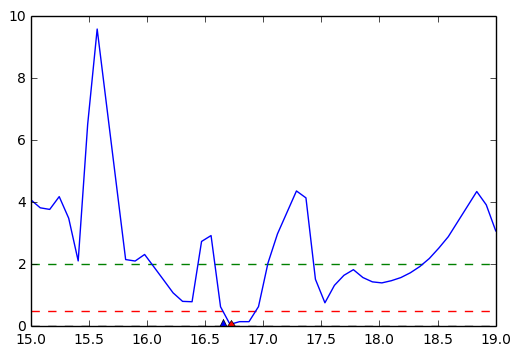

In [81]:
plt.plot(J_plt, interp_L(J_plt))
plt.hlines(0, J_plt.min(), J_plt.max(), linestyles='dashed')
plt.plot(Jmin, 0, 'b^', markersize=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin)
plt.plot(16.72, 0, 'rd', markersize=6, label=r'$\mathcal{J}_{TRUE}$ = 16.72')
for i,(c,h) in enumerate(zip(['r','g','c'],[0.5,2.0,4.5])):
    JL, JR = eval('J%ssL'%str(i+1)), eval('J%ssR'%str(i+1))
    plt.hlines(h, J_plt.min(), J_plt.max(), linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%(i+1)+'\t'+'[%2s,%2s]'%(str(JL),str(JR)))
plt.legend(numpoints=1,fontsize=14).get_frame().set_facecolor('w')
plt.text(15.5, 7,'a = %.2f (1)'%Ja +'\n'+
                 'b = %.2f (3)'%Jb +'\n'+
                 'c = %.2f (1)'%Jc +'\n'+
                 r'$r_s$ = %.2f (0.35)'%Jr +'\n'+
                 r'$\rho_s$ = %.2e'%Jrho +'\n     (7.55e+07)')

plt.ylim(-0.5,20);
#plt.xlim(16.3,17.5);
#plt.savefig('results/LikeJ_rabc_20p.png',format='png',dpi=300);